In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split, KFold, GroupKFold,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler, RobustScaler
from sklearn.metrics import *
import sys, os
import random

In [91]:
import warnings
warnings.simplefilter("ignore")

In [92]:
df = pd.read_csv('solar_wind.csv')
df.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392320 entries, 0 to 8392319
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   period       object 
 1   timedelta    object 
 2   bx_gse       float64
 3   by_gse       float64
 4   bz_gse       float64
 5   theta_gse    float64
 6   phi_gse      float64
 7   bx_gsm       float64
 8   by_gsm       float64
 9   bz_gsm       float64
 10  theta_gsm    float64
 11  phi_gsm      float64
 12  bt           float64
 13  density      float64
 14  speed        float64
 15  temperature  float64
 16  source       object 
dtypes: float64(14), object(3)
memory usage: 1.1+ GB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bx_gse,8066432.0,-0.661017,3.669730,-54.63,-3.27,-0.67,2.02,55.55
by_gse,8066432.0,0.109787,3.975340,-51.69,-2.46,0.11,2.64,57.60
bz_gse,8066432.0,-0.022742,3.351972,-55.00,-1.70,0.01,1.69,74.03
theta_gse,8066432.0,0.154563,32.129161,-89.89,-21.45,0.14,21.68,89.94
phi_gse,8065932.0,194.175887,96.628127,0.00,124.07,176.86,286.42,360.00
bx_gsm,8066432.0,-0.660866,3.667605,-54.63,-3.27,-0.67,2.02,55.54
by_gsm,8066432.0,0.088421,3.909885,-52.68,-2.38,0.08,2.54,53.88
bz_gsm,8066432.0,-0.029128,3.430580,-55.69,-1.80,0.00,1.79,72.45
theta_gsm,8066432.0,0.196769,33.278891,-89.91,-22.79,0.06,23.13,89.96
phi_gsm,8065932.0,194.371219,96.828179,0.00,124.69,177.66,286.56,360.00


In [95]:
df.isnull().sum()

period              0
timedelta           0
bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64

In [48]:
df.shape

(8392320, 17)

In [49]:
numeric_columns = ['bx_gse', 'by_gse', 'bz_gse', 'theta_gse', 'bx_gsm','by_gsm', 'bz_gsm', 'theta_gsm','phi_gse' , 'phi_gsm', 'bt']

In [96]:
for column in numeric_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    df['source'].fillna(method='ffill', inplace=True)

In [97]:
df.isnull().sum()

period              0
timedelta           0
bx_gse              0
by_gse              0
bz_gse              0
theta_gse           0
phi_gse             0
bx_gsm              0
by_gsm              0
bz_gsm              0
theta_gsm           0
phi_gsm             0
bt                  0
density        684890
speed          689555
temperature    811768
source              0
dtype: int64

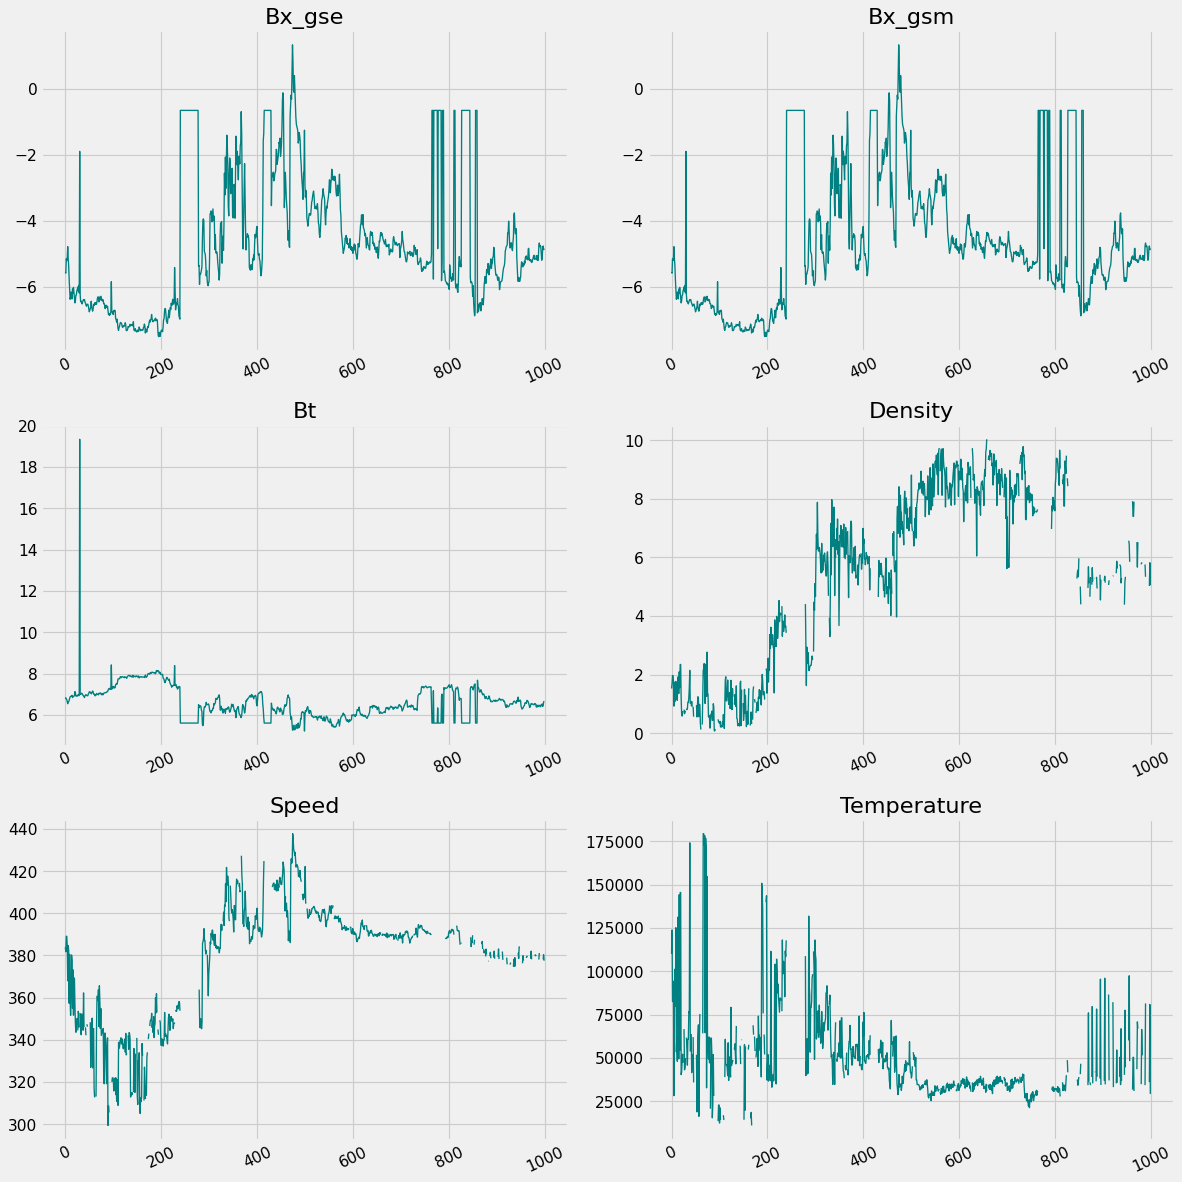

In [98]:
plt.style.use('fivethirtyeight')
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
        ax=axes[i // 2, i % 2],
        title=f"{key.capitalize()}",
        rot=25, color='teal', lw=1.2
        )
    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()
cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(df[cols_to_plot].iloc[:1000])

In [53]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [99]:
dst = pd.read_csv("labels.csv")
dst.head()

,period,timedelta,dst
0,train_a,0 days 00:00:00,-7
1,train_a,0 days 01:00:00,-10
2,train_a,0 days 02:00:00,-10
3,train_a,0 days 03:00:00,-6
4,train_a,0 days 04:00:00,-2


In [100]:
sunspots = pd.read_csv("sunspots.csv")
sunspots.head()

,period,timedelta,smoothed_ssn
0,train_a,0 days 00:00:00,65.4
1,train_a,13 days 00:00:00,72.0
2,train_a,44 days 00:00:00,76.9
3,train_a,74 days 00:00:00,80.8
4,train_a,105 days 00:00:00,85.4


In [101]:
df.timedelta = pd.to_timedelta(df.timedelta)
dst.timedelta = pd.to_timedelta(dst.timedelta)
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)

In [102]:
df.set_index(["period", "timedelta"], inplace=True)
dst.set_index(["period", "timedelta"], inplace=True)
sunspots.set_index(["period", "timedelta"], inplace=True)

In [103]:
joined = df.join(sunspots).join(dst).fillna(method="ffill")

In [30]:
!pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/276.5 MB 6.7 MB/s eta 0:00:42
   ---------------------------------------- 2.4/276.5 MB 7.5 MB/s eta 0:00:37
    --------------------------------------- 4.5/276.5 MB 8.4 MB/s eta 0:00:33
    --------------------------------------- 6.6/276.5 MB 8.9 MB/s eta 0:00:31
   - -------------------------------------- 9.2/276.5 MB 10.0 MB/s eta 0:00:27
   - -------------------------------------- 11.3/276.5 MB 9.9 MB/s eta 0:00:27
   -- ------------------------------------- 14.7/276.5 MB 11.0 MB/s eta 0:00:24
   -- ------------------------------------- 18.9/276.5 MB 12.3 MB/s eta 0:00:21
   --- ------------------------------------ 23.9/276.5 MB 13.7 MB/s eta 0:00:19
   ---- ----------------------------------- 28.6/276.5 MB 14.7 MB/s eta 

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.8.2 requires typing-extensions>=4.6.1; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.20.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
typeguard 4.3.0 requires typing-extensions>=4.10.0, but you have typing-extensions 4.5.0 which is incompatible.
visions 0.7.6 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [104]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(2020)
set_seed(2021)

In [105]:
from sklearn.preprocessing import StandardScaler

SOLAR_WIND_FEATURES = [
"bt",
"temperature",
"bx_gse",
"by_gse",
"bz_gse",
"speed",
"density",
]

In [106]:
XCOLS = (
[col + "_mean" for col in SOLAR_WIND_FEATURES]
+ [col + "_std" for col in SOLAR_WIND_FEATURES]
+ ["smoothed_ssn"]
)

In [62]:
def impute_features(feature_df):
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    feature_df = feature_df.interpolate()
    return feature_df

In [63]:
def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    agged = feature_df.groupby(["period", feature_df.index.get_level_values(1).floor("H")]).agg(aggs)
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


In [65]:
def preprocess_features(df, sunspots, scaler=None, subset=None):
    if subset:
        df = df[subset]
        hourly_features = aggregate_hourly(df).join(sunspots)
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)
        normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,)
        imputed = impute_features(normalized)
    return imputed, scaler


In [66]:
features, scaler = preprocess_features(df, sunspots, subset=SOLAR_WIND_FEATURES)

In [67]:
features.shape

(139872, 15)

In [70]:
features.isna().sum() 

bt_mean             0
bt_std              0
temperature_mean    0
temperature_std     0
bx_gse_mean         0
bx_gse_std          0
by_gse_mean         0
by_gse_std          0
bz_gse_mean         0
bz_gse_std          0
speed_mean          0
speed_std           0
density_mean        0
density_std         0
smoothed_ssn        0
dtype: int64

In [71]:
YCOLS = ["t0", "t1"]

def process_labels(dst):
    y = dst.copy()
    y["t1"] = y.groupby("period").dst.shift(-1)
    y.columns = YCOLS
    return y

In [72]:
labels = process_labels(dst)

In [73]:
data = labels.join(features)

In [74]:
def get_train_test_val(data, test_per_period, val_per_period):
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    val = data.groupby("period").tail(val_per_period)
    train = interim[~interim.index.isin(val.index)]
    return train, test, val

In [75]:
train, test, val = get_train_test_val(data, test_per_period=6_000,val_per_period=3_000)

In [76]:
import tensorflow as tf
from keras import preprocessing

data_config = {
"timesteps": 32,
"batch_size": 32,
}

In [77]:
def timeseries_dataset_from_df(df, batch_size):
    dataset = None
    timesteps = data_config["timesteps"]
    for _, period_df in df.groupby("period"):
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]
        period_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        inputs,
        outputs,
        timesteps,
        batch_size=batch_size,
        )
    if dataset is None:
        dataset = period_ds
    else:
        dataset = dataset.concatenate(period_ds)
    return dataset

In [78]:
train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])
print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")

Number of train batches: 1638
Number of val batches: 92


In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM

model_config = {"n_epochs": 20, "n_neurons": 512, "dropout": 0.4, "stateful":False}
model = Sequential()
model.add(
LSTM(
model_config["n_neurons"],
batch_input_shape=(None, data_config["timesteps"], len(XCOLS)),
stateful=model_config["stateful"],
dropout=model_config["dropout"],
)
)
model.add(Dense(len(YCOLS)))
model.compile(
loss="mean_squared_error",
optimizer="adam",
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1081344   
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 1082370 (4.13 MB)
Trainable params: 1082370 (4.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
history = model.fit(
                    train_ds,batch_size=data_config["batch_size"],epochs=model_config["n_epochs"],
                    verbose=1,shuffle=False,validation_data=val_ds)

Epoch 1/20
1638/1638 [==============================] - 154s 93ms/step - loss: 263.6059 - val_loss: 89.0550
Epoch 2/20
1638/1638 [==============================] - 160s 98ms/step - loss: 272.2145 - val_loss: 94.2698
Epoch 3/20
1638/1638 [==============================] - 165s 101ms/step - loss: 268.9538 - val_loss: 102.0004
Epoch 4/20
1638/1638 [==============================] - 166s 101ms/step - loss: 257.7656 - val_loss: 87.1110
Epoch 5/20
1638/1638 [==============================] - 163s 100ms/step - loss: 232.6409 - val_loss: 109.6536
Epoch 6/20
1638/1638 [==============================] - 164s 100ms/step - loss: 217.3053 - val_loss: 93.1353
Epoch 7/20
1638/1638 [==============================] - 163s 100ms/step - loss: 195.0026 - val_loss: 64.0274
Epoch 8/20
1638/1638 [==============================] - 162s 99ms/step - loss: 176.2950 - val_loss: 93.8721
Epoch 9/20
1638/1638 [==============================] - 160s 98ms/step - loss: 161.9606 - val_loss: 53.4411
Epoch 10/20
1638/1638

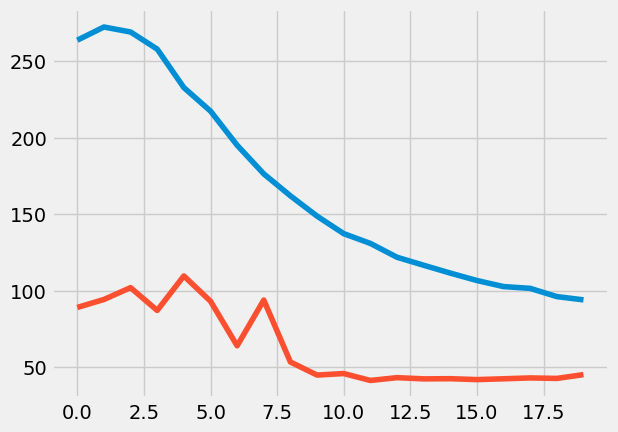

In [87]:
for name, values in history.history.items():
    plt.plot(values)

In [88]:
test_ds = timeseries_dataset_from_df(test, data_config["batch_size"])

In [89]:
mse = model.evaluate(test_ds)
print(f"Test RMSE: {mse**.5:.2f}")

186/186 [==============================] - 9s 48ms/step - loss: 59.4392
Test RMSE: 7.71


In [108]:
import pickle

with open('solar_flare.pkl', 'wb') as file:
    pickle.dump(df, file)